In [10]:
# System imports
import random
import sys
import os
import logging
import json
from pathlib import Path

# Machine learning-related libraries
import numpy as np
import tensorflow as tf
import sklearn
from sklearn.decomposition import PCA

# Graphics packages
from matplotlib import pyplot
from mpl_toolkits import mplot3d
pyplot.style.use('seaborn-v0_8-white') # Choose pyplot styling

# Setting float precision
np.set_printoptions(precision=3)

In [11]:
from importlib import reload
from IPython.display import display, Markdown

reload(logging)
logging.basicConfig(stream=sys.stdout, format='',
                level=logging.INFO, datefmt=None)
log = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def display_header(text: str) -> None:
    """
    Display a header 
    """
    display(Markdown(f'### {text}'))

2023-11-19 14:52:11.719357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [2]
	 [[{{node Placeholder/_3}}]]
2023-11-19 14:52:11.719614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2]
	 [[{{node Placeholder/_0}}]]
2023-11-19 14:52:11.751686: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_28' with dtype string
	 [[{{node Placeholde

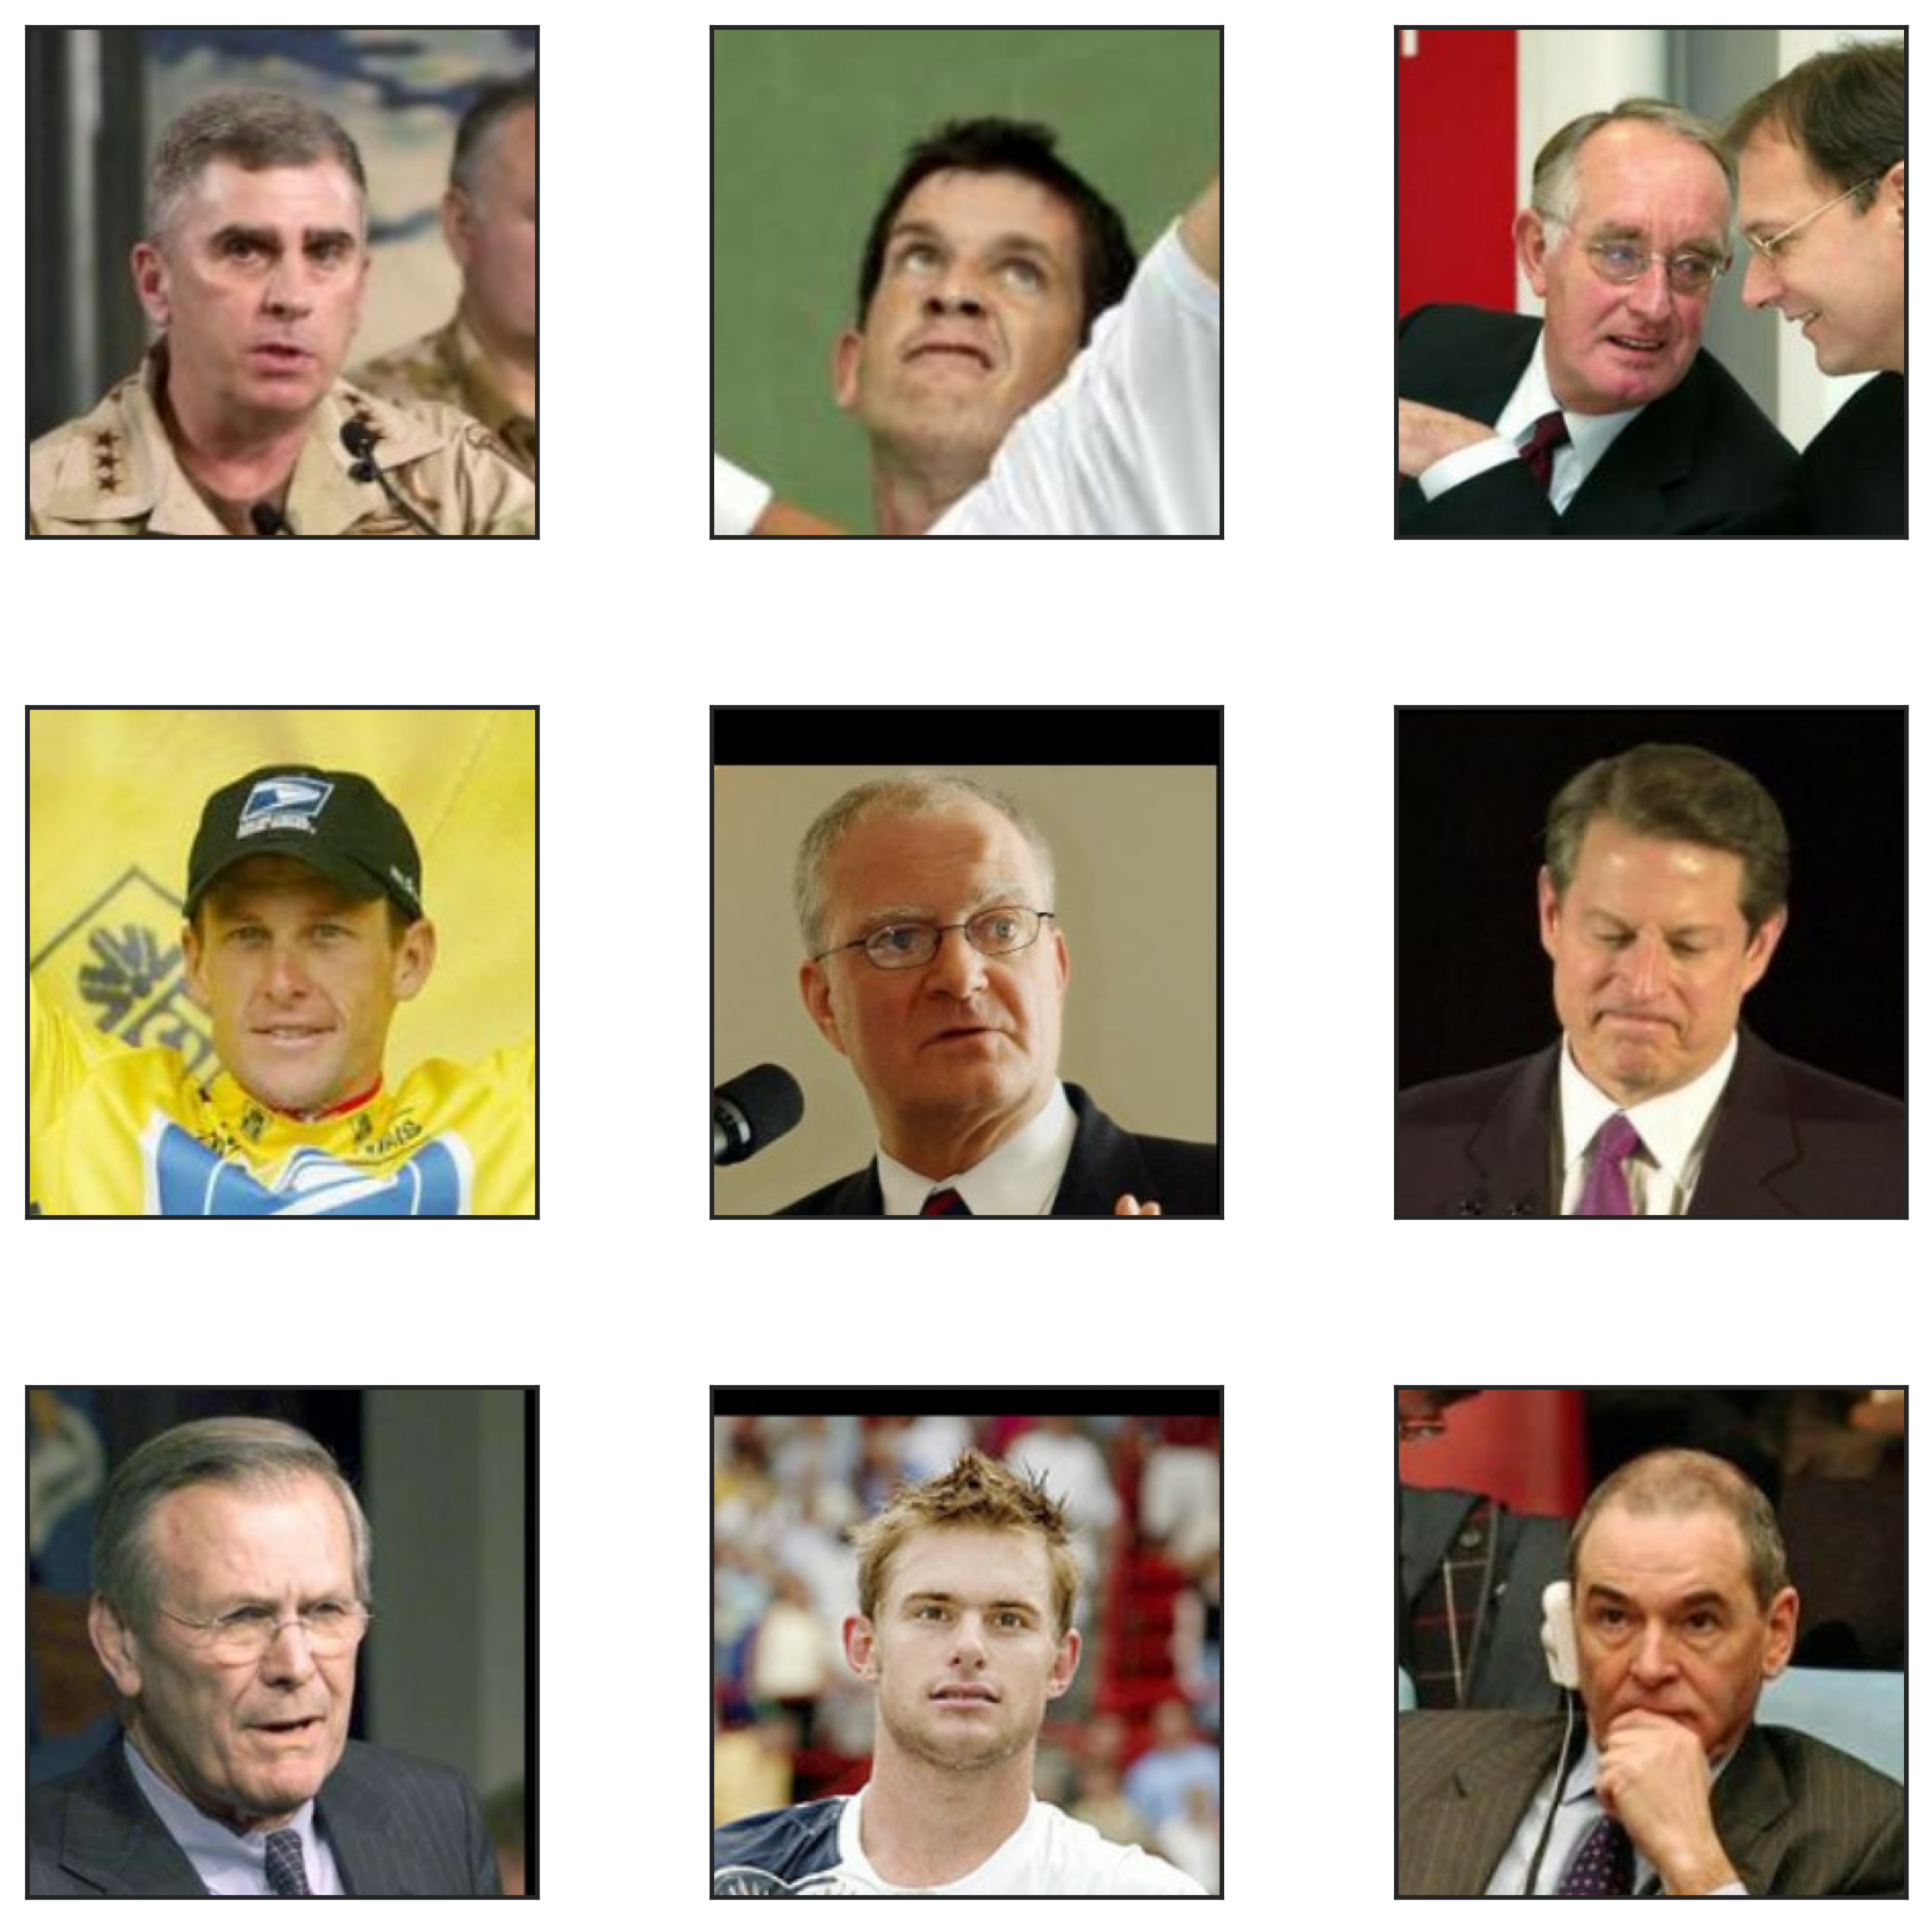

In [22]:
ds, ds_info = tfds.load('lfw', split='train', with_info=True, shuffle_files=True)

fig = tfds.show_examples(ds, ds_info)

In [25]:
def normalize_img(image):
    """Normalizes images: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255.

ds = ds.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds = ds.cache()
ds = ds.shuffle(ds_info.splits['train'].num_examples)
ds = ds.batch(128)
ds = ds.prefetch(tf.data.AUTOTUNE)

TypeError: in user code:

    File "/var/folders/v0/zz8w2jg50k15rrlj48nht3l00000gn/T/ipykernel_28737/1754317964.py", line 3, in normalize_img  *
        return tf.cast(image, tf.float32) / 255.

    TypeError: Expected any non-tensor type, but got a tensor instead.
